In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('database.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

In [22]:
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1986 non-null   int64  
 1   name                     1986 non-null   object 
 2   date                     1986 non-null   object 
 3   manner_of_death          1986 non-null   object 
 4   armed                    1986 non-null   object 
 5   age                      1986 non-null   float64
 6   gender                   1986 non-null   object 
 7   race                     1986 non-null   object 
 8   city                     1986 non-null   object 
 9   state                    1986 non-null   object 
 10  signs_of_mental_illness  1986 non-null   bool   
 11  threat_level             1986 non-null   object 
 12  flee                     1986 non-null   object 
 13  body_camera              1986 non-null   bool   
dtypes: bool(2), float64(1), int64

In [24]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [25]:
def cutDay(date):
    return date[:7]

YMDate = df['date'].apply(cutDay)
df.insert(3, "YMDate",YMDate , True)
df.head()

,id,name,date,YMDate,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,2015-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,2015-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,2015-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,2015-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,2015-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [26]:
def cutY(date):
    return date[:4]

YDate = df['date'].apply(cutY)
df.insert(4, "YDate",YDate , True)
df.head()

,id,name,date,YMDate,YDate,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,2015-01,2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,2015-01,2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,2015-01,2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,2015-01,2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,2015-01,2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### เริ่ม

In [27]:
print('Earliest date:', df['date'].min())
print('Latest date:', df['date'].max())

Earliest date: 2015-01-02
Latest date: 2017-02-28


In [28]:
print('Mean age:', round(df['age'].mean()))
print('Min/Max age:', df['age'].min(),'/', df['age'].max())

Mean age: 36
Min/Max age: 6.0 / 83.0


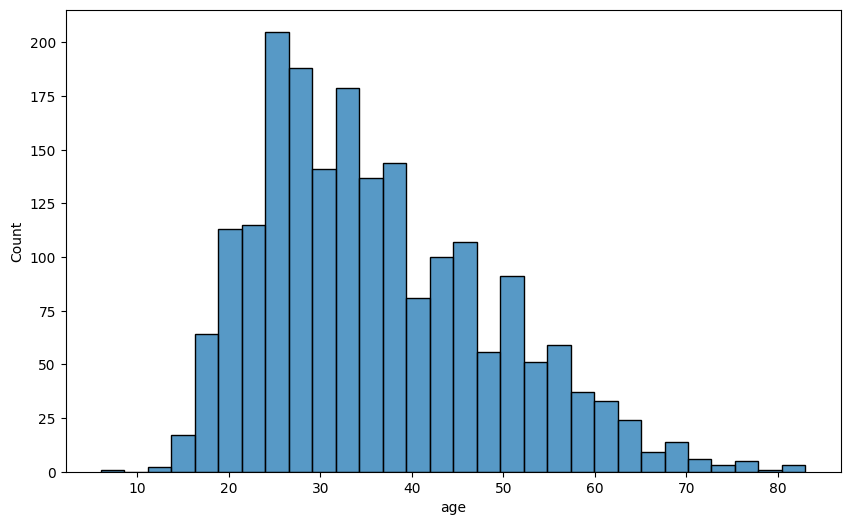

In [29]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins=30)
plt.show()

In [30]:
df[df['age'] == df['age'].min()]

,id,name,date,YMDate,YDate,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
830,980,Jeremy Mardis,2015-11-03,2015-11,2015,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True


In [31]:
df[df['age'] == df['age'].max()]

,id,name,date,YMDate,YDate,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
275,357,Richard Dale Weaver,2015-04-12,2015-04,2015,shot,machete,83.0,M,W,Oklahoma City,OK,True,other,Not fleeing,False
1878,2095,Quinton Phillips,2016-12-01,2016-12,2016,shot,gun,83.0,M,W,Dover,AR,False,attack,Not fleeing,False


<Axes: xlabel='race', ylabel='Count'>

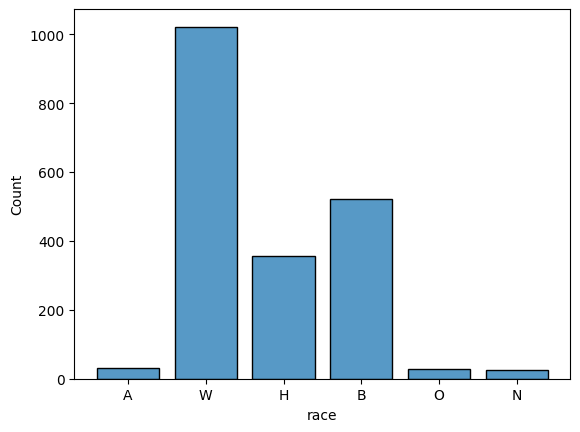

In [32]:
# index = ['Asian', 'Black', 'Hispanic', 'Nat Amer.', 'White']
sns.histplot(data=df, x="race", multiple="dodge", shrink=.8)

<Axes: xlabel='YDate', ylabel='Count'>

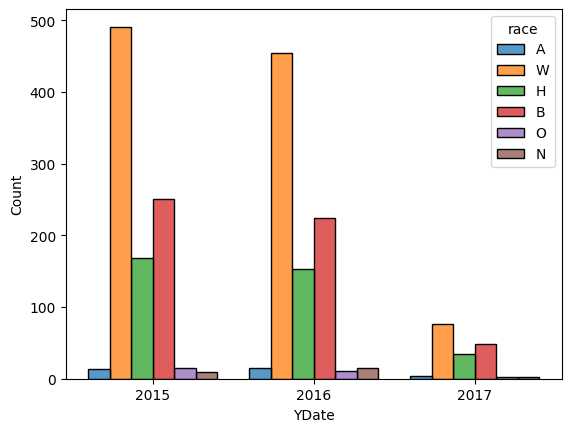

In [33]:
sns.histplot(data=df, x="YDate", hue= 'race', multiple="dodge", shrink=.8)

<Axes: xlabel='YDate', ylabel='Count'>

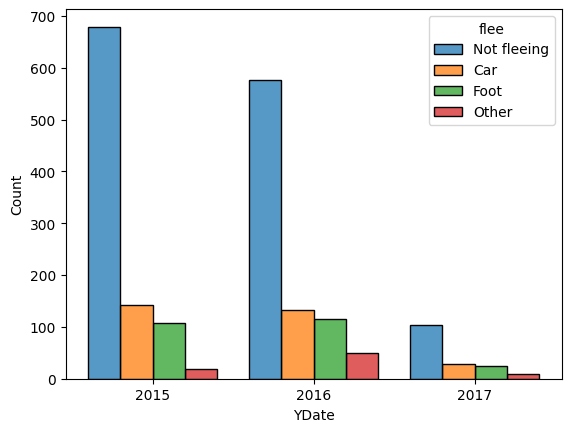

In [34]:
sns.histplot(data=df, x="YDate", hue= 'flee', multiple="dodge", shrink=.8)

<Axes: xlabel='threat_level', ylabel='Count'>

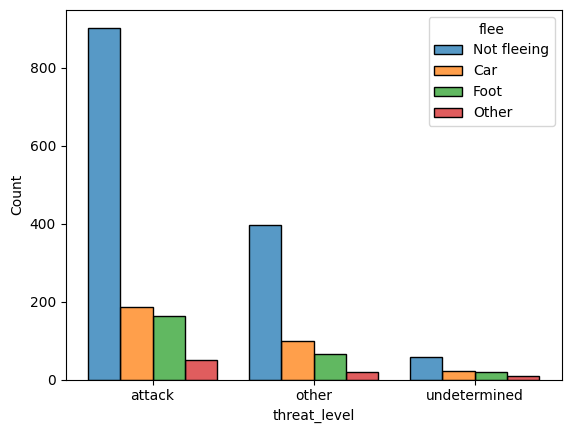

In [35]:
sns.histplot(data=df, x="threat_level", hue= 'flee', multiple="dodge", shrink=.8)

In [36]:
df['armed'].value_counts()[:10]

armed
gun               1094
knife              290
unarmed            151
vehicle            128
undetermined        90
toy weapon          90
machete             15
unknown weapon      11
sword                8
hammer               7
Name: count, dtype: int64

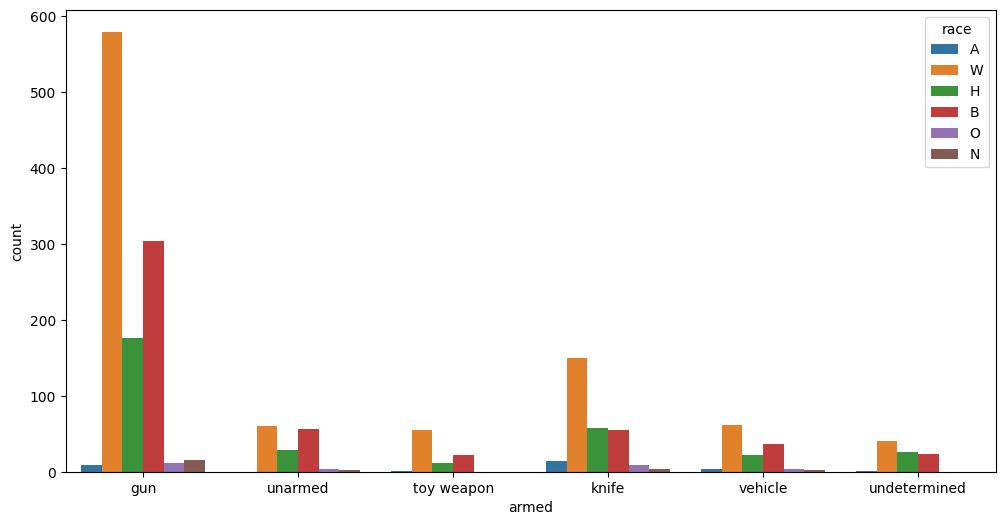

In [37]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='armed', data=df[df['armed'].map(df['armed'].value_counts()) > 30], hue='race')
plt.show()

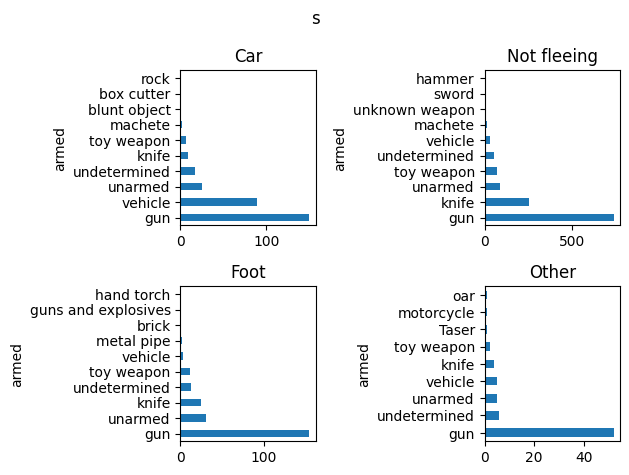

In [38]:
fig, axes = plt.subplots( ncols = 2, nrows = 2 )
df[df['flee'] == 'Car'].value_counts('armed')[:10].plot(kind='barh' , ax=axes[0,0] , title='Car')
df[df['flee'] == 'Not fleeing'].value_counts('armed')[:10].plot(kind='barh' , ax=axes[0,1] , title='Not fleeing')
df[df['flee'] == 'Foot'].value_counts('armed')[:10].plot(kind='barh' , ax=axes[1,0] , title='Foot')
df[df['flee'] == 'Other'].value_counts('armed')[:10].plot(kind='barh' , ax=axes[1,1] , title='Other')
plt.suptitle("s")
fig.tight_layout()